In [19]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [97]:
dades = {}
for file in glob.glob("dades_merged/*.csv"):
    nfile = file.split("/")[-1].split(".")[0]
    print(nfile)
    dades[nfile] = pd.read_csv(file)


padro_ocupacio_mitjana
contractes_lloguer
renda_barcelona
distribucio_territorial_renda_familiar
renda_neta_mitjana_per_persona
canvis_de_domicili_nacionalitat
lloguer_preu_trim_amb_trimestres
lloguer_preu_trim
domicilis_nacionalitat_espanyola_estrangera


In [152]:
dades["lloguer_preu_trim_amb_trimestres"]
n = 0
for i, y in enumerate(dades["lloguer_preu_trim_amb_trimestres"]["Preu"]):
    if math.isnan(y):
        #print(i, len(dades["lloguer_preu_trim_amb_trimestres"]))
        n += 1
print(n)

275


In [189]:
def preus_lloguers_any(nom_districte):
    preus_lloguers = dades["lloguer_preu_trim_amb_trimestres"]
    
    preus_lloguers = preus_lloguers[preus_lloguers["Any"] >= 2015]
    preus_lloguers = preus_lloguers[preus_lloguers["Any"] <= 2018]
    preus_lloguers = preus_lloguers[preus_lloguers["Lloguer_mitja"] == "Lloguer mitjà mensual (Euros/mes)"]
    preus_lloguers = preus_lloguers[preus_lloguers["Nom_Districte"] == nom_districte]

    lineplot = {}
    av = {}

    for (x, y) in zip(preus_lloguers["Any"], preus_lloguers["Preu"]):
        if math.isnan(y): continue
        if x in av: 
            lineplot[x] += y
            av[x] += 1
        else: 
            lineplot[x] = y
            av[x] = 1

    return [x for x in lineplot], [12*lineplot[x]/av[x] for x in lineplot]



In [154]:
preus_lloguers_any("")

([2014, 2015, 2016, 2017, 2018, 2019, 2020],
 [661.6390476190479,
  695.2403985507245,
  748.2488447653434,
  829.3804029304031,
  874.0522592592592,
  923.3215613382898,
  915.9211895910772])

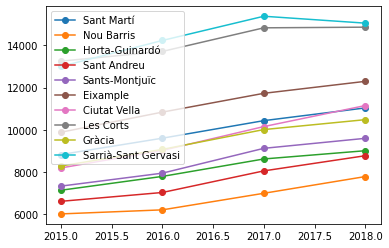

In [190]:
districtes = {}
for x in dades["lloguer_preu_trim_amb_trimestres"]["Nom_Districte"]:
    if not x in districtes: districtes[x] = 1

c = []
ys = []
for i_d, d in enumerate(districtes):
    x, y = preus_lloguers_any(d)
    plt.plot(x, y, "-o", label=d)

plt.legend()
#plt.yticks([i for i in range(0, 26000, 5000)])
plt.show()
    

In [177]:
def salari_any(nom_districte):
    renda = dades["renda_neta_mitjana_per_persona"]
    renda = renda[renda["Nom_Districte"] == nom_districte]

    lineplot = {}
    av = {}

    for (x, y) in zip(renda["Any"], renda["Import_Euros "]):
        if x in av: 
            lineplot[x] += y
            av[x] += 1
        else: 
            lineplot[x] = y
            av[x] = 1

    return [x for x in lineplot], [lineplot[x]/av[x] for x in lineplot]


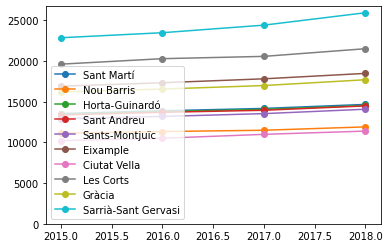

In [191]:

c = []
ys = []
for i_d, d in enumerate(districtes):
    x, y = salari_any(d)
    plt.plot(x, y, "-o", label=d)
plt.legend()
plt.yticks([i for i in range(0, 26000, 5000)])
plt.show()
    

In [187]:
def preu_entre_salari_any(nom_districte):
    preus_lloguers = dades["lloguer_preu_trim_amb_trimestres"]
    preus_lloguers = preus_lloguers[preus_lloguers["Any"] >= 2015]
    preus_lloguers = preus_lloguers[preus_lloguers["Any"] <= 2018]
    preus_lloguers = preus_lloguers[preus_lloguers["Lloguer_mitja"] == "Lloguer mitjà mensual (Euros/mes)"]
    preus_lloguers = preus_lloguers[preus_lloguers["Nom_Districte"] == nom_districte]

    lineplot = {}
    av = {}

    for (x, y) in zip(preus_lloguers["Any"], preus_lloguers["Preu"]):
        if math.isnan(y): continue
        if x in av: 
            lineplot[x] += y
            av[x] += 1
        else: 
            lineplot[x] = y
            av[x] = 1

    #return [x for x in lineplot], [lineplot[x]/av[x] for x in lineplot]
    
    
    renda = dades["renda_neta_mitjana_per_persona"]
    renda = renda[renda["Nom_Districte"] == nom_districte]

    lineplot_2 = {}
    av_2 = {}

    for (x, y) in zip(renda["Any"], renda["Import_Euros "]):
        if x in av_2: 
            lineplot_2[x] += y
            av_2[x] += 1
        else: 
            lineplot_2[x] = y
            av_2[x] = 1

    return [x for x in lineplot], [12*(lineplot[x]/av[x])/(lineplot_2[x]/av_2[x]) for x in lineplot]
    

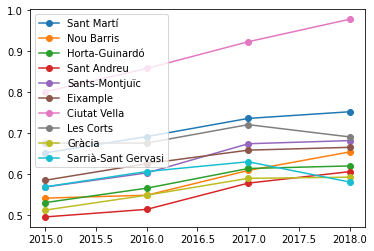

In [188]:

c = []
ys = []
for i_d, d in enumerate(districtes):
    x, y = preu_entre_salari_any(d)
    plt.plot(x, y, "-o", label=d)
plt.legend()
#plt.yticks([i for i in range(0, 26000, 5000)])
plt.show()